<header style="padding:1px;background:#f9f9f9;border-top:3px solid #00b2b1"><img id="Teradata-logo" src="https://www.teradata.com/Teradata/Images/Rebrand/Teradata_logo-two_color.png" alt="Teradata" width="220" align="right" />

<b style = 'font-size:28px;font-family:Arial;color:#E37C4D'>Time Series Analysis - Analyzing Consumer Complaints Over Time</b>
</header>

<p style = 'font-size:16px;font-family:Arial'>
In this example we will be analyzing the number of complaints over time received by the Consumer Financial Protection Bureau (CFPB).
<p style = 'font-size:16px;font-family:Arial'>
How can we use Vantage to extract insights and tell a story behind a dataset? In this use case, you will see how powerful and simple it is to extract answers from a public dataset available through <a href="http://data.gov">Data.gov</a>. We use SQL and a visualization tool to analyze the number of complaints over time to answer the following questions:
<br><p style = 'font-size:16px;font-family:Arial'>
 <i>What are the trends of complaints over time? How can we interpret the outliers in the dataset?</i>
<br>
<p style = 'font-size:16px;font-family:Arial'>    
By answering questions like the ones above, we gain a deeper understanding of the dataset, and we can explain in plain language how the number of complaints evolve over time. In the Explore section, we focus on analyzing the number of complaints over time and identifying trends and outliers in the time series to answer the questions above.
</p>    

<p style = 'font-size:28px;font-family:Arial;color:#E37C4D'><b>1. Connect to Vantage</b></p>

<p style = 'font-size:18px;font-family:Arial;color:#E37C4D'> <b>Let's start by connecting to the Teradata system </b></p>
<p style = 'font-size:16px;font-family:Arial'>You will be prompted to provide the password. Enter your password, press Enter, then use down arrow to go to next cell.</p>

In [1]:
%connect local, hidewarnings=true

Password: ········


Success: 'local' connection established and activated for user 'demo_user', with default database 'demo_user'


<p style = 'font-size:16px;font-family:Arial'>Setup for execution of notebook. Begin running steps with Shift + Enter keys.</p>

In [2]:
Set query_band='DEMO=Consumer_Complaints_SQL.ipynb;' update for session;

Success: 1 rows affected

<p style = 'font-size:18px;font-family:Arial;color:#E37C4D'> <b>Getting Data for This Demo</b></p>
<p style = 'font-size:16px;font-family:Arial'>We have provided data for this demo on cloud storage. In this demo since we are using Temporal table we will be creating databases and tables in local storage and use them in the notebook. Please execute the procedure in the next cell.</p>


In [3]:
call get_data('DEMO_Financial_cloud');    -- takes about 50 seconds, estimated space: 0 MB
--call get_data('DEMO_Financial_local');     -- takes about 4 minutes, estimated space: 300 MB

Success: 0 rows affected

Success: 0 rows affected

,Message
1,That ran for 0:00:38.73 with 17 statements and 0 errors.


<p style = 'font-size:16px;font-family:Arial'>Optional step – if you want to see status of databases/tables created and space used.</p>


In [4]:
call space_report();  -- optional, takes about 10 seconds

Success: 0 rows affected

Success: 0 rows affected

,Space_Report
1,"You have: #databases=1 #tables=7 #views=14 You have used 1.7 MB of 27,914.4 MB available - 0.0% ... Space Usage OK"
2,
3,Database Name #tables #views Avail MB Used MB
4,"demo_user 7 7 27,914.4 MB 1.7 MB"
5,DEMO_Financial 0 7 0.0 MB 0.0 MB


<p style = 'font-size:28px;font-family:Arial;color:#E37C4D'><b>2.  Querying the Data</b></p>
<p style = 'font-size:16px;font-family:Arial'>We have made our connection to the Vantage system, now let's start exploring the data. We'll start by counting the number of rows in the table.

In [5]:
select count(*) from DEMO_Financial.Consumer_complaints;

,Count(*)
1,1273782


<p style = 'font-size:16px;font-family:Arial'>
There are just under 1.3 million rows. Not a problem to analyze large datasets using Vantage, lets take a look at a sample of the data.

In [6]:
select TOP 100 * from DEMO_Financial.Consumer_Complaints;

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zip_code,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed,complaint_id
1,2017-05-05,Debt collection,Medical debt,Attempts to collect debt not owed,Debt is not yours,,,"OPTIMUM OUTCOMES, INC.",GA,30083,,,Postal mail,2017-05-15,Closed with explanation,Yes,,2476894
2,2017-05-05,Debt collection,Credit card debt,Took or threatened to take negative or legal action,Threatened or suggested your credit would be damaged,F,,ENCORE CAPITAL GROUP INC.,NY,104XX,,Consent provided,Web,2017-05-12,Closed with explanation,Yes,,2476519
3,2017-05-05,Credit card or prepaid card,Store credit card,"Advertising and marketing, including promotional offers",Confusing or misleading advertising about the credit card,I,Company has responded to the consumer and the CFPB and chooses not to provide a public response,"CITIBANK, N.A.",MD,,Servicemember,Consent provided,Web,2017-05-05,Closed with explanation,Yes,,2476865
4,2017-05-05,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Incorrect information on your report,Account status incorrect,I,Company has responded to the consumer and the CFPB and chooses not to provide a public response,Experian Information Solutions Inc.,OH,450XX,,Consent provided,Web,2017-05-08,Closed with non-monetary relief,Yes,,2477166
5,2017-05-05,Mortgage,Conventional home mortgage,Trouble during payment process,,,,RUSHMORE LOAN MANAGEMENT SERVICES LLC,CA,91304,,,Referral,2017-05-19,Closed with explanation,Yes,,2476888
6,2017-05-05,Debt collection,Other debt,Attempts to collect debt not owed,Debt was paid,D,,"Credit Bureau Collection Services, Inc.",GA,31203,,Consent provided,Web,2017-05-05,Closed with explanation,Yes,,2476902
7,2017-05-05,Mortgage,Conventional home mortgage,Struggling to pay mortgage,,X,,OCWEN LOAN SERVICING LLC,TN,378XX,"Older American, Servicemember",Consent provided,Web,2017-05-08,Closed with explanation,Yes,,2477136
8,2017-05-05,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Incorrect information on your report,Account information incorrect,,Company has responded to the consumer and the CFPB and chooses not to provide a public response,Experian Information Solutions Inc.,TN,37013,,,Postal mail,2017-05-08,Closed with explanation,Yes,,2476449
9,2017-05-05,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Incorrect information on your report,Information belongs to someone else,,Company has responded to the consumer and the CFPB and chooses not to provide a public response,Experian Information Solutions Inc.,GA,30308,,,Postal mail,2017-05-08,Closed with non-monetary relief,Yes,,2476856
10,2017-05-05,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Incorrect information on your report,Information belongs to someone else,,Company has responded to the consumer and the CFPB and chooses not to provide a public response,Experian Information Solutions Inc.,NC,27295,,Consent not provided,Web,2017-05-05,Closed with explanation,Yes,,2476814


<p style = 'font-size:28px;font-family:Arial;color:#E37C4D'><b>3.  Visualizing the Data</b></p>
<p style = 'font-size:16px;font-family:Arial'>
From the query above, we notice that this dataset has a lot of information. To derive some insights, we need to start grouping the data.
<p style = 'font-size:16px;font-family:Arial'>
The first column is <b>date_received</b>. This is the date the complaints were received, and it means that we can look at a time series plot of the data. Let's start by grouping the counts of <b>complaint_id</b> over time, using <b>date_received</b> as our time axis.

In [7]:
select date_received, count(complaint_id) as counts
from DEMO_Financial.Consumer_Complaints
group by date_received;

,date_received,counts
1,2017-06-15,728
2,2014-01-04,178
3,2018-07-23,754
4,2014-08-15,475
5,2019-01-20,233
6,2016-10-07,624
7,2011-12-26,21
8,2016-03-20,200
9,2012-06-23,66
10,2018-05-12,418


<p style = 'font-size:16px;font-family:Arial'>
This is great; we now have the number of complaints (<b>counts</b>) by time (<b>date_received</b>), but how do we make sense of this data? Let's plot this time series on a graph.

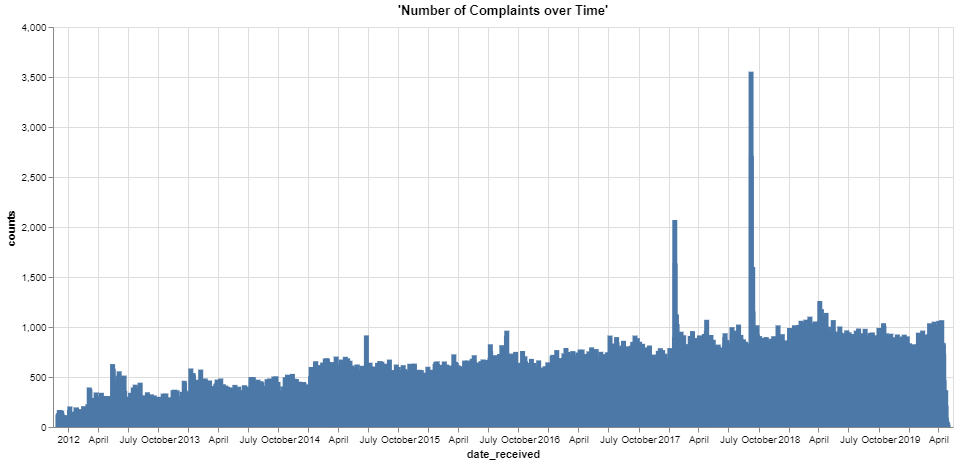

In [8]:
%chart date_received, counts, title='Number of Complaints over Time', width=900, height=400

<p style = 'font-size:16px;font-family:Arial'>
By visualizing the data above, we can see that the number of complaints varies a lot over time and there also seem to be more complaints as time progresses. There are also some unusual spikes in 2017. Let's understand more about our data. We start by looking at the general trend.
<br>
Let's group the data by month and replot the graph above.

In [9]:
select extract(year from date_received) || extract(month from date_received) as month_date, count(complaint_id) as counts
from DEMO_Financial.Consumer_Complaints
group by month_date
order by month_date;

,month_date,counts
1,2011 12,2536
2,2012 1,3230
3,2012 2,3509
4,2012 3,6230
5,2012 4,5703
6,2012 5,7617
7,2012 6,7841
8,2012 7,6755
9,2012 8,6877
10,2012 9,5493


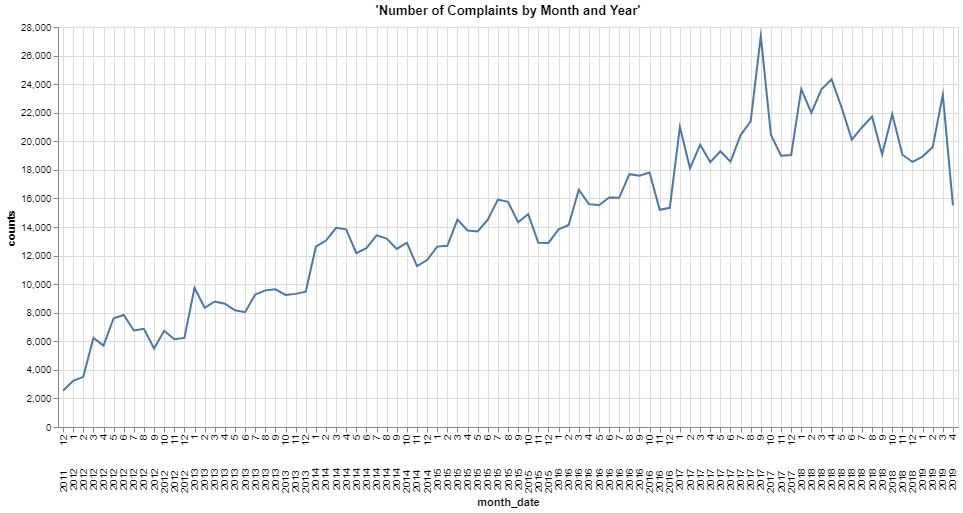

In [10]:
%chart month_date, counts, title='Number of Complaints by Month and Year', width=900, height=400, mark=line

<p style = 'font-size:16px;font-family:Arial'>Looking at complaints over month and year, we see there is clearly an upward trend. One hypothesis is that as time progresses, people get more conscious and spread the word. The media can also advertise the complaint channels over time. Through this chart we can see clearly the spikes that we saw above were in January 2017 and September 2017. Let's dive deeper into these dates and draw some insights on the next step.

<p style = 'font-size:28px;font-family:Arial;color:#E37C4D'><b>4.  Extracting Insights from the Data</b></p>
<p style = 'font-size:16px;font-family:Arial'>
Let's narrow down the two spikes above and see exactly where they are happening. We can do this by ploting another time series plot, this time only in 2017.

In [11]:
select date_received, count(complaint_id) as counts
from DEMO_Financial.Consumer_Complaints
where year(date_received) = 2017
group by date_received
order by date_received;

,date_received,counts
1,2017-01-01,105
2,2017-01-02,299
3,2017-01-03,604
4,2017-01-04,789
5,2017-01-05,718
6,2017-01-06,656
7,2017-01-07,257
8,2017-01-08,232
9,2017-01-09,585
10,2017-01-10,744


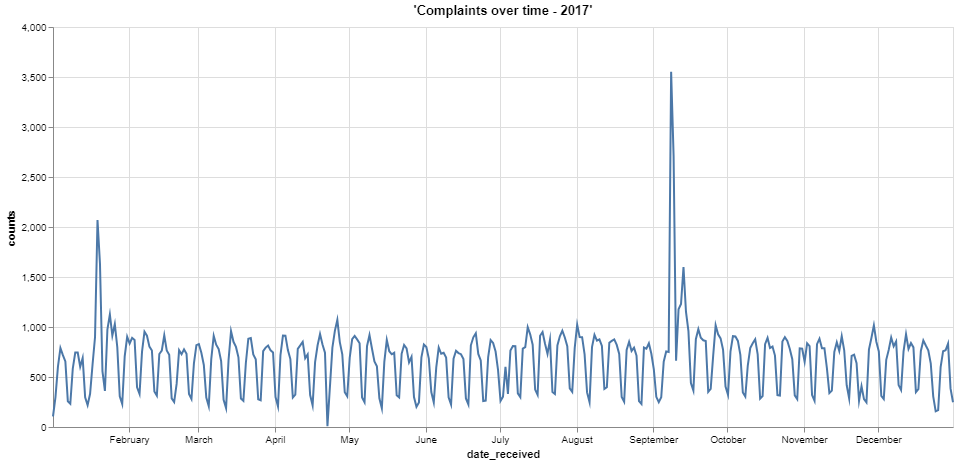

In [12]:
%chart date_received, counts, title='Complaints over time - 2017', width=900, height=400, mark=line

<p style = 'font-size:16px;font-family:Arial'>As we look at the peaks, we find that they occurred from January 15th to 21st and during the first week of September. To find the actual dates of the peaks, we can limit the query to pick up at least 1,500 complaints a day.

In [13]:
select date_received,
    month(date_received) as month_date,
    count(complaint_id) as counts
from DEMO_Financial.Consumer_Complaints
where year(date_received) = 2017 and month_date in (1, 9)
group by date_received
having counts >= 1500
order by month_date, counts desc;

,date_received,month_date,counts
1,2017-01-19,1,2070
2,2017-01-20,1,1633
3,2017-09-08,9,3553
4,2017-09-09,9,2709
5,2017-09-13,9,1600


<p style = 'font-size:16px;font-family:Arial'>Let's look at some of the issues that were reported during these dates.

In [14]:
select date_received, company, count(company) as counts
from DEMO_Financial.Consumer_Complaints
where date_received in (
    date '2017-01-19',
    date '2017-01-20',
    date '2017-09-08',
    date '2017-09-09',
    date '2017-09-13'
)
group by date_received, company
having counts > 500
order by date_received, counts desc;

,date_received,company,counts
1,2017-01-19,"Navient Solutions, LLC.",1195
2,2017-01-20,"Navient Solutions, LLC.",895
3,2017-09-08,"EQUIFAX, INC.",2731
4,2017-09-09,"EQUIFAX, INC.",2318
5,2017-09-13,"EQUIFAX, INC.",547


<p style = 'font-size:16px;font-family:Arial'>Interestingly, we can see that the great majority of the the complaints were directed at two companies: Navient Solutions and EQUIFAX. These seem to be highly correlated with the Navient Lawsuit and the Equifax breach events that happened around those dates, respectively. Let's recap what happened:

<p>
<blockquote><i>Navient Lawsuit: On January 2017, the U.S. Consumer Financial Protection Bureau (CFPB) and the Illinois and Washington attorneys general sued Navient Solutions. Navient is a major servicer of private and federal student loans. According to the CFPB at least since January 2010 "Navient has misallocated payments, steered struggling borrowers toward multiple forbearances instead of income-driven repayment plans, and provided unclear information about how to re-enrol in income-driven repayment plans and how to qualify for a co-signer release"

Equifax Breach: On September 7th, 2017 Equifax announced a cybersecurity breach, one of the largest in history, had happened from mid-May through July 2017. Some of the personal information that was accessed included names, social security numbers, birth dates, addresses and driver's license numbers.</i></blockquote>
</p>
<p style = 'font-size:16px;font-family:Arial'>
Let's now look at the top issues for Navient Solutions and Equifax during those periods to confirm our hypothesis.

In [15]:
-- analyze top issues reported against Navient Solutions on 2017-01-19 and 2017-01-20
select company, product, issue, count(issue) as counts
from DEMO_Financial.Consumer_Complaints
where date_received in (
    date '2017-01-19',
    date '2017-01-20') and
    company like 'Navient Solutions%'
group by company, product, issue
order by counts desc;

,company,product,issue,counts
1,"Navient Solutions, LLC.",Student loan,Dealing with my lender or servicer,1107
2,"Navient Solutions, LLC.",Student loan,Can't repay my loan,968
3,"Navient Solutions, LLC.",Student loan,Getting a loan,9
4,"Navient Solutions, LLC.",Debt collection,Cont'd attempts collect debt not owed,2
5,"Navient Solutions, LLC.",Debt collection,False statements or representation,2
6,"Navient Solutions, LLC.",Consumer Loan,Managing the loan or lease,1
7,"Navient Solutions, LLC.",Debt collection,Communication tactics,1


<p style = 'font-size:16px;font-family:Arial'>
We can see the top two issues represent the majority of complaint counts against Navient Solutions. Furthermore, by looking at the product and issue columns we can infer that they are indeed related to the lawsuit regarding student loans. Now let's do the same analysis for the Equifax issues.

In [16]:
-- analyze top issues reported against EQUIFAX on 2017-01-19 and 2017-01-20
select
    company,
    product,
    issue,
    count(issue) as counts
from DEMO_Financial.Consumer_Complaints
where date_received in (
    date '2017-09-08',
    date '2017-09-09',
    date '2017-09-13') and
        company like 'EQUIFAX%'
group by company, product, issue
order by counts desc;

,company,product,issue,counts
1,"EQUIFAX, INC.","Credit reporting, credit repair services, or other personal consumer reports",Improper use of your report,4500
2,"EQUIFAX, INC.","Credit reporting, credit repair services, or other personal consumer reports",Problem with fraud alerts or security freezes,322
3,"EQUIFAX, INC.","Credit reporting, credit repair services, or other personal consumer reports",Credit monitoring or identity theft protection services,264
4,"EQUIFAX, INC.","Credit reporting, credit repair services, or other personal consumer reports",Problem with a credit reporting company's investigation into an existing problem,234
5,"EQUIFAX, INC.","Credit reporting, credit repair services, or other personal consumer reports",Incorrect information on your report,177
6,"EQUIFAX, INC.","Credit reporting, credit repair services, or other personal consumer reports",Unable to get your credit report or credit score,35
7,"EQUIFAX, INC.","Credit reporting, credit repair services, or other personal consumer reports",Identity theft protection or other monitoring services,22
8,"EQUIFAX, INC.","Credit reporting, credit repair services, or other personal consumer reports",Problem with a company's investigation into an existing issue,10
9,"EQUIFAX, INC.",Debt collection,Attempts to collect debt not owed,7
10,"EQUIFAX, INC.","Credit reporting, credit repair services, or other personal consumer reports",Problem with customer service,6


<p style = 'font-size:16px;font-family:Arial'>Here we can also confirm our hypothesis. The top issues talk about improper use of the credit report, fraud alerts, identity theft etc. This really does seem related to the Equifax breach that happened around the same time frame.

<p style = 'font-size:28px;font-family:Arial;color:#E37C4D'><b>5.  Clean up </b>
<p style = 'font-size:20px;font-family:Arial;color:#E37C4D'> <b>Database and Tables </b>
<p style = 'font-size:16px;font-family:Arial'>The following code will clean up tables and databases created above.</p>

In [17]:
call remove_data('DEMO_Financial');
-- takes about 10 seconds, optional if you want to use the data later
--the same data is used in UseCases/VantageAnalyticLibrary and UseCases/FSCustomerJourney

Success: 0 rows affected

Success: 0 rows affected

,Message
1,Removed objects related to DEMO_Financial. That ran for 0:00:06.22


<p style = 'font-size:28px;font-family:Arial;color:#E37C4D'><b>6. Dataset</b>
<p style = 'font-size:16px;font-family:Arial'>
The Consumer Complaints Database has complaints data that was received by the Consumer Financial Protection Bureau (CFPB) on financial products and services, which include but are not limited to bank accounts, credit cards, credit reporting, debt collection, money transfers, mortgages, student loans and other types of consumer credit. The dataset is refreshed daily and contains information on the provider, the complaint, date, ZIP code and more. More information about the dataset can be found in the Consumer section of the <a href="data.gov">Data.gov</a> website.
<p style = 'font-size:16px;font-family:Arial'>
The <b>TRNG_FinancialProtection.consumer_complaints</b> dataset has 1,273,782 rows, each representing a unique consumer complaint, and 18 columns, representing the following features:

- `date_received`: date that CFPB received the complaint
- `product`: type of product the consumer identified in the complaint
- `sub_product`: type of sub-product the consumer identified in the complaint
- `issue`: issue the consumer identified in the complaint
- `sub_issue`: sub-issue the consumer identified in the complaint
- `consumer_complaint_narrative`: consumer-submitted description of "what happened" from the complaint
- `company_public_response`: company's optional, public-facing response to a consumer's complaint
- `company`: complaint is about this company
- `state`: state of the mailing address provided by the consumer
- `zip_code`: mailing ZIP code provided by the consumer
- `tags`: data that supports easier searching and sorting of complaints submitted by or on behalf of consumers
- `consumer_consent_provided`: identifies whether the consumer option in to publish their complaint narrative
- `submitted_via`: how the complaint was submitted to the CFPB
- `date_sent_to_company`: date the CFBP sent the complaint to the company
- `company_response_to_consumer`: how the company responded
- `timely_response`: whether the company gave a timely response
- `consumer_disputed`: whether the company disputed the company's response
- `complaint_id`: unique identification number for a complaint

<p style = 'font-size:28px;font-family:Arial;color:#E37C4D'><b>7. Explore</b>
<p style = 'font-size:16px;font-family:Arial'>   
Through this notebook, we saw the power and simplicity of running queries in the SQL Editor and how it can be leveraged to extract insights from the data to tell the story behind a dataset. Hopefully you've noticed how easy it is to use Vantage to write your own SQL queries.<br>You can continue to explore Vantage to extract more insights and find answers to other questions by using the preloaded dataset. Here are some suggestions:
<ul style = 'font-size:16px;font-family:Arial'>
    <li>What are the most common types of complaints? By grouping the <b>product</b> category, we can arrive at this answer. How does this change over time?</li>
    <li>How are customers submitting their complaints? The column <b>submitted_via</b> can also be grouped to answer for this question.</li>
    <li>What proportion of the customer complaints are disputed? By aggregating counts of <b>customer_disputed</b> we can answer this question.</li>
    <li>Is there seasonality in the data? What is the reason for the seasonality? If we subtract the trend from the series we can analyze the seasonality in the dataset. Are most of the complaints filed during the week or on the weekends?</li>
    </ul>

<footer style="padding:10px;background:#f9f9f9;border-bottom:3px solid #394851">©2023 Teradata. All Rights Reserved</footer>